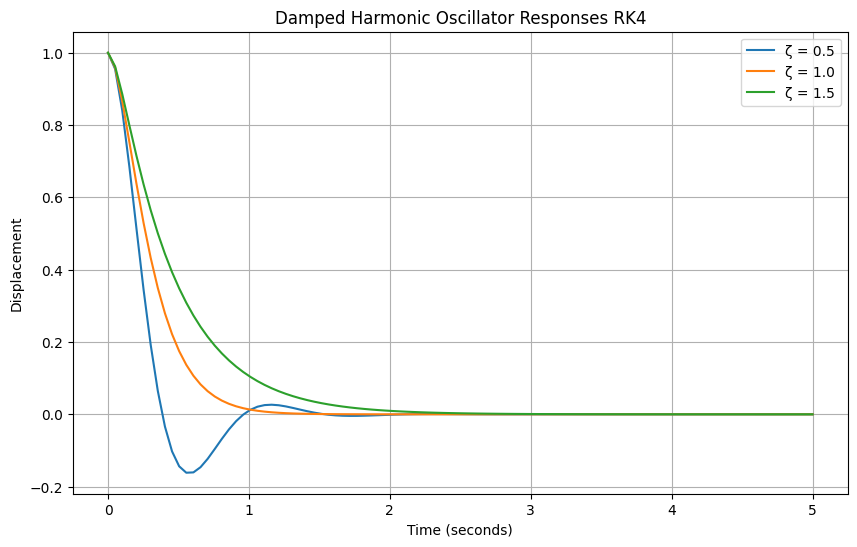

In [8]:
########################################
# 1. under/over/critical damping RK4   #
########################################
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta(f, x0, t):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0, :] = x0
    for i in range(n-1):
        dt = t[i+1] - t[i]
        k1 = dt * f(x[i, :], t[i])
        k2 = dt * f(x[i, :] + 0.5 * k1, t[i] + 0.5 * dt)
        k3 = dt * f(x[i, :] + 0.5 * k2, t[i] + 0.5 * dt)
        k4 = dt * f(x[i, :] + k3, t[i+1])
        x[i+1, :] = x[i, :] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return x

omega0 = 2 * np.pi  
zetas = [0.5, 1.0, 1.5]  
t = np.linspace(0, 5, 100)  

def damped_oscillator(x, t, zeta, omega0):
    x1, x2 = x
    dx1dt = x2
    dx2dt = -2 * zeta * omega0 * x2 - omega0**2 * x1
    return np.array([dx1dt, dx2dt])

x0 = [1.0, 0.0]  

solutions = []
for zeta in zetas:
    solution = runge_kutta(lambda x, t: damped_oscillator(x, t, zeta, omega0), x0, t)
    solutions.append(solution)

# Plotting the results
plt.figure(figsize=(10, 6))
for sol, zeta in zip(solutions, zetas):
    plt.plot(t, sol[:, 0], label=f'ζ = {zeta}')

plt.title('Damped Harmonic Oscillator Responses RK4')
plt.xlabel('Time (seconds)')
plt.ylabel('Displacement')
plt.legend()
plt.grid(True)
plt.show()

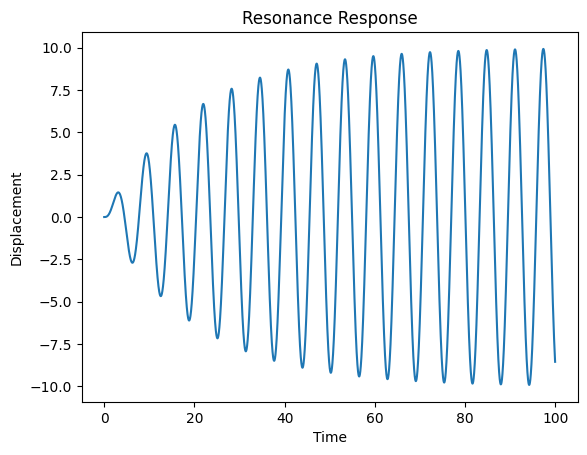

In [10]:
########################################
# 2. resonance solution RK4            #
########################################
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import inv
from math import sqrt, sin

m = 0.1 
k = 0.1 
omega = sqrt(k / m) 

c = 0.01  
F0 = 0.1 

delta_t = 0.01 
time = np.arange(0, 100, delta_t)  

x0 = 0.0 
v0 = 0.0 

y = np.array([v0, x0])
A = np.array([[m, 0.0], [0.0, 1.0]])
B = np.array([[c, k], [-1.0, 0.0]])

YY = []
VV = []

A_inv = inv(A)

for t in time:
    F = np.array([F0 * sin(omega * t), 0.0])  
    k1 = A_inv.dot(F - B.dot(y))
    k2 = A_inv.dot(F - B.dot(y + 0.5 * delta_t * k1))
    k3 = A_inv.dot(F - B.dot(y + 0.5 * delta_t * k2))
    k4 = A_inv.dot(F - B.dot(y + delta_t * k3))

    G = (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
    y = y + delta_t * G

    YY.append(y[1])
    VV.append(y[0])

plt.plot(time, YY)
plt.title('Resonance Response')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.show()



In [3]:
########################################
# 3. pygame                            #
########################################

import pygame 
import sys 

import math
import numpy as np

#resd me
#this program requires audio file(chip.mp3) & image(Einstein.jpg) in the C:\ folder


#pygame reset 
pygame.init()

#pygame initial setting 
width, height = 600, 400
color_val = 0

screen = pygame.display.set_mode((width,height))
clock = pygame.time.Clock()
font = pygame.font.Font(None, 64)
sub_font = pygame.font.Font(None, 32)
#image
image = pygame.image.load('C:\Einstein.jpg')

#sound 
pygame.mixer.init()
sound = pygame.mixer.Sound('C:\chip.mp3')
sound.play(-1)

#audio visualization
audio_data = pygame.sndarray.array(pygame.mixer.Sound('C:\chip.mp3'))
audio_data = audio_data.mean(axis=1)

def color_change(color_val):
    red = int((math.sin(color_val) + 1) * 127.5)
    green = int((math.sin(color_val + 2) + 1) * 127.5)
    blue = int((math.sin(color_val + 4) + 1) * 127.5)
    return red, green, blue

#bounce ball
#initail parameter
gravity = 9.81
ball_radius = 20
ball_pos =  height   
initial_speed = -20
ball_speed = initial_speed   
dt = 0.1      

while True:
    ball_speed += gravity * dt
    ball_pos += ball_speed

    if ball_pos >= height - ball_radius:
        ball_speed = initial_speed  
        ball_pos = height - ball_radius

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.mixer.music.stop() 
            pygame.mixer.quit()        
            pygame.quit()
            sys.exit()

    screen.fill(color_change(color_val))
    #print image
    screen.blit(image, (width*0.2, height*0.3))
    
    #print text
    main1_text = font.render('Welcome to Physics!', True, color_change(color_val+180)) 

    sub1_text = sub_font.render('it`s not that i`m so smart', True, color_change(color_val*0.3))
    sub2_text = sub_font.render('it`s just that', True, color_change(color_val*0.4))
    sub3_text = sub_font.render('i say with problems longer', True, color_change(color_val*0.5))
    sub4_text = sub_font.render('~Albert Einstein~', True, color_change(color_val*0.6))

    screen.blit(main1_text, (width*0.2,height*0.8))
    screen.blit(sub1_text, (width*0.5,height*0.3))
    screen.blit(sub2_text, (width*0.5,height*0.4))
    screen.blit(sub3_text, (width*0.5,height*0.5))
    screen.blit(sub4_text, (width*0.5,height*0.7))

    pygame.draw.circle(screen, (color_change(color_val+180)), (width * 0.1, int(ball_pos)), ball_radius)

    color_val += 0.1

    #print audio visualization
    step = max(1, int(len(audio_data) / width))
    for x in range(width):
        y = int((audio_data[x * step] / 2**16) * height*0.2 + height*0.2)
        pygame.draw.line(screen, (color_change(color_val+180)), (x, height*0.0), (x, y))

    clock.tick(60)
    pygame.display.update()

SystemExit: 

In [12]:
########################################
# 4. simple pendulum                   #
########################################

import pygame
import sys 

from math import *
import numpy as np
from numpy.linalg import inv

#setting color 
white = pygame.Color('white')
black = pygame.Color('black')

#setting screen  
width , height = 600, 400
screen = pygame.display.set_mode((width,height))
screen.fill(black)

pygame.display.update()

clock = pygame.time.Clock()

count = 0

l = 100
a = 0.0

x_center, y_center = width/2, height/2

#physics parameter 
g = 9.81
ll = 1.0
t, delta_t = 0.0, 0.01

y = np.array([1.0,1.0])
L = np.array([[ll,0.0],[0.0,1.0]])
F = np.array([0.0,0.0])

inv_L = inv(L)

#Slope(G) function
def G(t,y):
    F[0] = -g * sin(y[1])
    F[1] = y[0]
    return inv_L.dot(F)

#RK4 function 
def RK4(t, y, delta_t):
    k1 = G(t, y)
    k2 = G(t + 0.5*delta_t, y + 0.5*delta_t * k1)
    k3 = G(t + 0.5*delta_t, y + 0.5*delta_t * k2)
    k4 = G(t + 1.0*delta_t, y + 1.0*delta_t * k3)

    return (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0

def position(angle):
    x = l * sin(angle) + x_center
    y = l * cos(angle) + y_center
    return (x,y)

def render(position_xy):
    screen.fill(black)
    pygame.draw.line(screen, white,(x_center, y_center), (position_xy[0],position_xy[1]), 3)
    pygame.draw.circle(screen, white, (position_xy[0],position_xy[1]) , 10)

while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
    
    count += 1

    xy = position(y[1])
    render(xy)

    t += delta_t
    y = y + delta_t * RK4(t, y, delta_t)

    clock.tick(60)
    pygame.display.update()



SystemExit: 

In [13]:
########################################
# double pendulum                      #
########################################

import pygame
import sys 

from math import *
import numpy as np
from numpy.linalg import inv

#setting color 
white = pygame.Color('white')
black = pygame.Color('black')

#setting screen  
width , height = 600, 400
screen = pygame.display.set_mode((width,height))
screen.fill(black)

pygame.display.update()

clock = pygame.time.Clock()

count = 0

l = 100
a = 0.0

x_center, y_center = width/2, height/2

#physics parameter 
g = 9.81
m1, m2 = 1.0, 1.0
l1, l2 = 1.0, 1.0

t, delta_t = 0.0, 0.01

y = np.array([0.0,0.0,1.5,2.0])
# L = np.array([[ll,0.0],[0.0,1.0]])
F = np.array([0.0,0.0,0.0,0.0])

inv_L = inv(L)

#Slope(G) function
def G(t,y):
    F[0] = -m2 * l2 * y[1] * y[1] * sin(y[2] - y[3]) - (m1 + m2) * g * sin(y[2])
    F[1] = l1 * y[0] * y[0] * sin(y[2] - y[3]) - g * sin(y[3])
    F[2] = y[0]
    F[3] = y[1]

    L = np.array([
        [(m1+m2)*l1         , m2*cos(y[2]-y[3]) ,0  ,0],
        [l1*cos(y[2]-y[3])  , l2                ,0  ,0],
        [0                  , 0                 ,1  ,0],
        [0                  , 0                 ,0  ,1],
        ])
        
    return inv(L).dot(F)

#RK4 function 
def RK4(t, y, delta_t):
    k1 = G(t, y)
    k2 = G(t + 0.5*delta_t, y + 0.5*delta_t * k1)
    k3 = G(t + 0.5*delta_t, y + 0.5*delta_t * k2)
    k4 = G(t + 1.0*delta_t, y + 1.0*delta_t * k3)

    return (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0

def position(angle1, angle2):
    x1 = 100*l1 * sin(angle1) + x_center
    y1 = 100*l1 * cos(angle1) + y_center

    x2 = 100*l2 * sin(angle2) + x1
    y2 = 100*l2 * cos(angle2) + y1

    return (x1, y1), (x2, y2)

def render(position1_xy, position2_xy):
    screen.fill(black)
    # draw pendulum 1 position 
    pygame.draw.line(screen, white,(x_center, y_center), (position1_xy[0],position1_xy[1]), 3)
    pygame.draw.circle(screen, white, (position1_xy[0],position1_xy[1]) , 10)
    # draw pendulum 2 position
    pygame.draw.line(screen, white,(position1_xy[0], position1_xy[1]), (position2_xy[0],position2_xy[1]), 3)
    pygame.draw.circle(screen, white, (position2_xy[0],position2_xy[1]) , 10)

while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
    count += 1

    position1_xy, position2_xy = position(y[2], y[3])
    render(position1_xy, position2_xy)

    t += delta_t
    y = y + delta_t * RK4(t, y, delta_t)

    clock.tick(60)
    pygame.display.update()

SystemExit: 